<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_Python/blob/main/Colab_Notebook/02_07_07_08_survival_analysis_nnet_survival_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 7.8 Nnet-Survival: A Discrete-Time Survival Model

This tutorial provides a comprehensive guide to implementing and using nnet-survival, a discrete-time survival model that integrates with neural networks. The tutorial is based on the research paper by Gensheimer and Narasimhan (2019) and the implementation available on GitHub.

**References:**
- Gensheimer, M. F., & Narasimhan, B. (2019). A scalable discrete-time survival model for neural networks. *PeerJ*, 7, e6257. https://pmc.ncbi.nlm.nih.gov/articles/PMC6348952/
- GitHub Repository: https://github.com/MGensheimer/nnet-survival


## Overview of Nnet-Survival Models

Nnet-survival is a discrete-time survival model designed to work seamlessly with neural networks. It addresses several key challenges in survival analysis:

- **Handling Censored Data**: Survival data often contains censored observations where the event of interest hasn't occurred by the end of the study period.
- **Non-linear Relationships**: Neural networks can capture complex, non-linear relationships between covariates and survival outcomes.
- **Scalability**: The model can handle large datasets efficiently using mini-batch stochastic gradient descent.
- **Individualized Predictions**: Unlike traditional survival models, nnet-survival can generate personalized survival curves for each individual.

### Key Advantages:

1. **Flexibility**: Can model complex interactions and non-proportional hazards
2. **Scalability**: Efficient training on large datasets
3. **Integration**: Works with standard deep learning frameworks (TensorFlow/Keras)
4. **Interpretability**: Provides survival probabilities at discrete time intervals


## How it Works

The nnet-survival model operates through the following key steps:

**Time Discretization**

The continuous follow-up time is divided into discrete intervals. For example, a 5-year follow-up period might be divided into 40 intervals of approximately 45 days each.

***Hazard Probability Estimation**

For each time interval, the neural network predicts the **conditional hazard probability** - the probability that an event occurs in that interval, given that the subject has survived up to the start of that interval.

**Survival Probability Calculation**

The survival probability up to time $t$ is calculated by multiplying the conditional survival probabilities of all intervals up to $t$:

$$S(t) = \prod_{j=1}^{k} (1 - h_j)$$

where:
- $S(t)$ is the survival probability at time $t$
- $h_j$ is the hazard probability for interval $j$
- $k$ is the number of intervals up to time $t$

**Model Training**

The model is trained using maximum likelihood estimation with a custom loss function that accounts for:
- Uncensored observations (events observed)
- Censored observations (events not yet observed)

The loss function maximizes the likelihood of observing the actual survival times given the predicted hazard probabilities.


### Determination of Hazard Probability

The hazard probability in nnet-survival is determined through the following process:

**Neural Network Architecture**

The neural network takes covariates (features) as input and outputs a vector of probabilities, one for each time interval. The output layer uses a sigmoid activation function to ensure probabilities are between 0 and 1.

**Output Interpretation**

For each interval $j$, the neural network outputs $p_j$, which represents the **conditional probability of surviving interval $j$** (given survival up to the start of interval $j$).

The hazard probability for interval $j$ is then:

$$h_j = 1 - p_j$$

**Likelihood Function**

For an uncensored observation with event time in interval $k$:

$$L = h_k \prod_{j=1}^{k-1} (1 - h_j)$$

For a censored observation with censoring time in interval $k$:

$$L = \prod_{j=1}^{k} (1 - h_j)$$

The model maximizes the sum of log-likelihoods across all observations.


### Applications

Nnet-survival is particularly useful in:
- Medical research and clinical prediction
- Healthcare analytics
- Any domain with time-to-event data and complex covariate relationships

### Limitations and Considerations

1. **Time Discretization**: The choice of time intervals can affect model performance
2. **Hyperparameter Tuning**: Network architecture and training parameters need careful tuning
3. **Interpretability**: Neural networks are less interpretable than traditional survival models
4. **Computational Resources**: Deep networks may require significant computational resources


## 4. Implementation in Python {#implementation}

### 4.0 Environment Setup

**Important**: This tutorial uses a specific Python environment to ensure package compatibility.

**To use the correct environment:**

1. **If using Jupyter Notebook/Lab**:
   - Make sure your Jupyter kernel is set to use the environment at `/home/zia207/Python_Env/tensorflow`
   - You can check/change the kernel in: Kernel → Change Kernel → Select the tensorflow environment

2. **If running from terminal**:
   ```bash
   source /home/zia207/Python_Env/tensorflow/bin/activate
   jupyter notebook
   ```

3. **To verify the environment**:
   ```bash
   which python  # Should point to /home/zia207/Python_Env/tensorflow/bin/python
   ```

Let's start by installing the necessary packages and setting up the environment.


In [ ]:
import subprocess
import sys

def install_and_import(package_name, import_name=None):
    """Install a package if not already installed and import it"""
    if import_name is None:
        import_name = package_name

    try:
        # Try to import the package
        globals()[import_name] = __import__(import_name)
        print(f"{package_name} is already installed")
    except ImportError:
        # If not installed, install it
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            globals()[import_name] = __import__(import_name)
            print(f"{package_name} installed successfully")
        except Exception as e:
            print(f"Failed to install {package_name}: {e}")
            raise

# List of packages to check/install
packages = ['pandas', 'numpy', 'matplotlib', \
    'seaborn', 'scikit-learn', 'scikit-survival', \
        'lifelines', 'statsmodels', 'pymer4', 'PyMC',\
         'pycox', 'torchtuples', 'shap', \
             'polars', 'xgboost', 'torch', 'optuna']

# Install and import each package
for pkg in packages:
    try:
        install_and_import(pkg)
    except Exception as e:
        print(f"Error with package {pkg}: {e}")

# Verify installation by importing
print("Installed packages:")
for pkg in packages:
    try:
        __import__(pkg)
        print(f"✓ {pkg}")
    except ImportError:
        print(f"✗ {pkg}")

pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
Installing scikit-learn...
Failed to install scikit-learn: No module named 'scikit-learn'
Error with package scikit-learn: No module named 'scikit-learn'
Installing scikit-survival...
Failed to install scikit-survival: No module named 'scikit-survival'
Error with package scikit-survival: No module named 'scikit-survival'
lifelines is already installed
statsmodels is already installed
Installing pymer4...
  Using cached pymer4-0.9.2-py3-none-any.whl.metadata (4.1 kB)
Using cached pymer4-0.9.2-py3-none-any.whl (2.3 MB)
Failed to install pymer4: No module named 'rpy2'
Error with package pymer4: No module named 'rpy2'
Installing PyMC...
  Using cached pymc-5.26.1-py3-none-any.whl.metadata (16 kB)
  Using cached pytensor-2.35.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (6.8 kB)
  Using cached etuples-0.3.10-py3-none-any.whl.metad

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset, DataLoader

### Helper Functions

If `nnet_survival` is not available, we'll create the essential functions ourselves:

 - `make_surv_array`: Converts observed survival times and event indicators into a format (survival array) expected by the nnet-survival network, based on user-specified time intervals. Each entry encodes if a subject survived through an interval or not.

 - `surv_likelihood`: Returns a negative log-likelihood loss function suitable for nnet-survival, evaluating how well model-predicted survival probabilities match observed survival status across intervals.

 - `nnet_pred_surv`: Given a set of predicted conditional survival probabilities, this function computes the mean survival probability at one or more specified time points.

In [ ]:

def make_surv_array(t, f, breaks):
    """
    Converts time-to-event data to an array indicating survival status for each interval.

    For each patient, the function fills the array with 1s up until the interval containing the event/censoring.
    If an event occurs, the corresponding interval is set to 0. For censored times, it's left at 1.
    """
    n_samples = len(t)
    n_intervals = len(breaks) - 1
    y = np.zeros((n_samples, n_intervals))

    for i in range(n_samples):
        # Identify interval containing observed time
        interval_idx = np.searchsorted(breaks[1:], t[i], side='right')
        if interval_idx < n_intervals:
            y[i, :interval_idx] = 1.0
            if f[i] == 1:
                y[i, interval_idx] = 0.0
            else:
                y[i, interval_idx] = 1.0
        else:
            y[i, :] = 1.0
    return y


# - `surv_likelihood`: Returns a negative log-likelihood loss function suitable for nnet-survival,
#   evaluating how well model-predicted survival probabilities match observed survival status across intervals.
def surv_likelihood(n_intervals):
    """
    Returns a custom negative log-likelihood loss function for survival models.

    The function compares observed survival (y_true) and predicted probabilities (y_pred) for all intervals.
    """
    def loss(y_true, y_pred):
        # y_pred: conditional survival probs, y_true: interval status (1=alive, 0=event)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        log_lik = y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred)
        # Sum log-likelihood per patient, average over all
        return -tf.reduce_mean(tf.reduce_sum(log_lik, axis=1))
    return loss

# Brief explanation:
# - `nnet_pred_surv`: Given a set of predicted conditional survival probabilities, this function computes the mean survival probability
# at one or more specified time points.
def nnet_pred_surv(y_pred, breaks, t):
    """
    Computes predicted survival probability at each specified time using interval model output.

    For each time t, calculates the product of survival probabilities of all intervals up to that time.
    """
    if isinstance(t, (int, float)):
        t = [t]
    surv_prob = np.zeros(len(t))
    for i, time_point in enumerate(t):
        interval_idx = np.searchsorted(breaks[1:], time_point, side='right')
        if interval_idx == 0:
            surv_prob[i] = 1.0
        elif interval_idx >= y_pred.shape[1]:
            surv_prob[i] = np.prod(y_pred, axis=1).mean()
        else:
            surv_prob[i] = np.prod(y_pred[:, :interval_idx], axis=1).mean()
    return surv_prob[0] if len(surv_prob) == 1 else surv_prob

print("Helper functions defined successfully!")


Helper functions defined successfully!


### Define Time Intervals

**What are Time Intervals?**

In discrete-time survival models like nnet-survival, continuous survival time is divided into discrete intervals. This discretization is necessary because:

1. **Neural Network Output**: The network outputs a probability for each interval, not a continuous function
2. **Computational Efficiency**: Discrete intervals make the model computationally tractable
3. **Flexibility**: Allows modeling of time-varying effects and non-proportional hazards

**How Time Intervals Work:**

- **Interval Boundaries (`breaks`)**: An array that defines the start and end points of each time interval
  - Example: `[0, 45.625, 91.25, 136.875, ...]` means:
    - Interval 1: 0 to 45.625 days
    - Interval 2: 45.625 to 91.25 days
    - Interval 3: 91.25 to 136.875 days
    - And so on...

- **Number of Intervals**: If `breaks` has length `n+1`, there are `n` intervals
  - Each interval `j` spans from `breaks[j]` to `breaks[j+1]`

- **For Each Interval**: The model predicts:
  - **Conditional survival probability**: Probability of surviving through interval `j`, given survival up to the start of interval `j`
  - **Hazard probability**: `h_j = 1 - (conditional survival probability)`

**Choosing Interval Size:**

- **Too many intervals**: More granular but requires more parameters and may overfit
- **Too few intervals**: Less granular, may miss important time-varying patterns
- **Common approach**: Divide the maximum follow-up time into 20-50 intervals
- **Equal-width intervals**: Simple and commonly used (as in the code below)
- **Data-driven intervals**: Can use quantiles of observed event times

**In the Code Below:**

The example divides 5 years (1825 days) into approximately 40 intervals, each about 45.6 days long. This provides a good balance between granularity and computational efficiency.



In [ ]:
# Define time intervals
#
# This creates discrete time intervals for the survival model.
# The model will predict survival probabilities for each interval.
#
# Parameters:
#   - Start: 0 days
#   - End: 365 * 5 = 1825 days (5 years)
#   - Step: 365 / 8 = 45.625 days per interval
#
# Result: Approximately 40 intervals, each ~45.6 days long
#
# Why 365/8? This creates 8 intervals per year, giving good granularity
# while keeping computational costs manageable.

breaks = np.arange(0., 365. * 5, 365. / 8)  # Creates array: [0, 45.625, 91.25, ..., 1825]
n_intervals = len(breaks) - 1  # Number of intervals = number of gaps between break points

print(f"Number of intervals: {n_intervals}")
print(f"Interval boundaries (first 5): {breaks[:5]}")
print(f"Interval boundaries (last 5): {breaks[-5:]}")
print(f"\nEach interval represents approximately {(breaks[1] - breaks[0]):.2f} days")
print(f"Total follow-up period: {breaks[-1]:.0f} days ({breaks[-1]/365:.1f} years)")


Number of intervals: 39
Interval boundaries (first 5): [  0.     45.625  91.25  136.875 182.5  ]
Interval boundaries (last 5): [1596.875 1642.5   1688.125 1733.75  1779.375]


### Fit Model with Simulated Data with One Predictor

In this tutorial, we use simulated data for several important reasons:

1. **Controlled Environment**: We know the true underlying relationships, allowing us to verify that the model works correctly
2. **Reproducibility**: With a fixed random seed, results are consistent across runs
3. **Educational Value**: Simulated data helps illustrate key concepts without the complexity of real-world data issues (missing values, data quality, etc.)
4. **Quick Testing**: Enables rapid prototyping and testing of the model before applying it to real data

**What We Simulate:**

- **Binary Predictor**: A single feature (e.g., treatment group: 0 or 1)
- **Survival Times**: Generated from exponential distributions with different scales for each group
- **Censoring**: Random censoring times to create realistic censored observations
- **Event Indicators**: Whether the event occurred before censoring (1 = event, 0 = censored)

**Key Characteristics:**
- Group 0: Shorter mean survival time (scale = 200 days)
- Group 1: Longer mean survival time (scale = 400 days)
- Approximately 35-40% censoring rate (typical for survival studies)

This simple setup allows us to verify that the nnet-survival model can correctly identify and quantify the difference between the two groups.



In [ ]:
# Simulate data with one predictor
n_samples = 5000
np.random.seed(42)

# Generate a binary predictor
x_train = np.random.binomial(1, 0.5, n_samples).reshape(-1, 1)

# Generate survival times: group 0 has shorter survival, group 1 has longer survival
t_event = np.random.exponential(scale=200, size=n_samples) * (1 - x_train.flatten()) + \
          np.random.exponential(scale=400, size=n_samples) * x_train.flatten()

# Generate censoring times
t_cens = np.random.exponential(scale=500, size=n_samples)

# Observed time is minimum of event and censoring time
t_obs = np.minimum(t_event, t_cens)

# Event indicator: 1 if event occurred, 0 if censored
f_obs = (t_event <= t_cens).astype(int)

print(f"Number of samples: {n_samples}")
print(f"Number of events: {f_obs.sum()}")
print(f"Number of censored: {(1 - f_obs).sum()}")
print(f"Censoring rate: {(1 - f_obs).mean():.2%}")
print(f"\nMean survival time (group 0): {t_obs[x_train.flatten() == 0].mean():.2f} days")
print(f"Mean survival time (group 1): {t_obs[x_train.flatten() == 1].mean():.2f} days")


Number of samples: 5000
Number of events: 3207
Number of censored: 1793
Censoring rate: 35.86%

Mean survival time (group 0): 139.41 days
Mean survival time (group 1): 228.66 days


### Convert to Survival Array


The `make_surv_array` function transforms continuous survival data into a discrete-time format that the neural network can process. This is a crucial preprocessing step for nnet-survival models.

**What is a Survival Array?**

A survival array is a matrix where:
- **Rows** = individual patients/subjects
- **Columns** = time intervals (one column per interval)
- **Values** = survival status for each interval (1 = survived, 0 = event occurred)

**How the Conversion Works:**

For each patient with observed time `t_obs` and event indicator `f_obs`:

1. **Intervals before the event/censoring time**: Set to `1.0` (patient survived through these intervals)
2. **Interval containing the event/censoring time**:
   - If `f_obs = 1` (event occurred): Set to `0.0` (event happened in this interval)
   - If `f_obs = 0` (censored): Set to `1.0` (patient was still alive at censoring)
3. **Intervals after the event/censoring time**: Set to `0.0` (not applicable)

**Example Interpretation:**

For an uncensored observation with event at day 90:
- Interval 1 (0-45.6 days): `1.0` ✓ survived
- Interval 2 (45.6-91.3 days): `0.0` ✗ event occurred here
- Interval 3+ (91.3+ days): `0.0` (not applicable)

For a censored observation at day 45:
- Interval 1 (0-45.6 days): `1.0` ✓ survived (but censored)
- Interval 2+ (45.6+ days): `0.0` (unknown - patient was lost to follow-up)

**Why This Format?**

- **Neural Network Input**: The network needs a fixed-size input for each patient
- **Likelihood Calculation**: The loss function uses these arrays to compute the likelihood of observed survival patterns
- **Handles Censoring**: Properly encodes both uncensored and censored observations

**Output Shape:**
- Shape: `(n_samples, n_intervals)`
- Example: `(5000, 39)` means 5000 patients and 39 time intervals

In [ ]:
# Convert to survival array format
y_train = make_surv_array(t_obs, f_obs, breaks)

print(f"Survival array shape: {y_train.shape}")
print(f"\nExample survival array (first uncensored observation):")
print(y_train[f_obs == 1][0])
print(f"\nExample survival array (first censored observation):")
print(y_train[f_obs == 0][0])


Survival array shape: (5000, 39)

Example survival array (first uncensored observation):
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Example survival array (first censored observation):
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Build the Neural Network Model

**Note on Model Architecture**

The nnet-survival model uses a simple but effective neural network architecture designed specifically for discrete-time survival analysis.

**Model Structure:**

1. **Input Layer**:
   - Takes covariates (features) as input
   - In this simple example: 1 feature (binary predictor)
   - Shape: `(batch_size, 1)`

2. **Dense Layer**:
   - Fully connected layer with `n_intervals` neurons
   - Each neuron corresponds to one time interval
   - Outputs raw logits for each interval
   - Initialization: Weights and biases start at zero (conservative initialization)

3. **Activation Layer (Sigmoid)**:
   - Converts logits to probabilities
   - Ensures outputs are between 0 and 1
   - Each output represents the **conditional survival probability** for that interval

**Model Output:**

- **Shape**: `(batch_size, n_intervals)`
- **Interpretation**: For each patient, the model outputs a vector of probabilities
  - `output[j]` = probability of surviving interval `j`, given survival up to interval `j`
  - Hazard probability for interval `j`: `h_j = 1 - output[j]`

**Loss Function:**

- **Custom Survival Likelihood**: `surv_likelihood(n_intervals)`
  - Computes negative log-likelihood based on observed survival patterns
  - Properly handles both uncensored and censored observations
  - Maximizes the probability of observing the actual survival times

**Optimizer:**

- **Adam Optimizer**: Adaptive learning rate optimizer
  - Learning rate: 0.001 (default)
  - Well-suited for survival analysis problems
  - Efficiently handles sparse gradients

**Why This Simple Architecture?**

- **Sufficient for Basic Cases**: A single dense layer can capture linear relationships between features and survival
- **Interpretable**: Simple models are easier to understand and debug
- **Fast Training**: Minimal computational overhead
- **Extensible**: Can easily add more layers for complex relationships (see SUPPORT dataset example later)

**For More Complex Problems:**

When dealing with multiple features or non-linear relationships, you can extend this architecture with:
- Multiple hidden layers
- Dropout for regularization
- Batch normalization
- More sophisticated activation functions

In [ ]:
# Build the neural network model
model = Sequential([
    Dense(n_intervals, input_dim=1, kernel_initializer='zeros', bias_initializer='zeros'),
    Activation('sigmoid')
])

# Compile with custom survival loss function
model.compile(
    loss=surv_likelihood(n_intervals),
    optimizer=optimizers.Adam(learning_rate=0.001)
)

print("Model architecture:")
model.summary()


Model architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 39)             │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 39)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78 (312.00 B)

 Trainable params: 78 (312.00 B)

 Non-trainable params: 0 (0.00 B)

### Train the Model

**Note on Model Training**

Training the nnet-survival model involves optimizing the neural network weights to maximize the likelihood of observing the actual survival patterns in the data. This section explains the key components of the training process.

**Training Process:**

1. **Early Stopping Callback**:
   - **Purpose**: Prevents overfitting by stopping training when the model stops improving
   - **Monitor**: Tracks the loss function value
   - **Patience**: Number of epochs to wait before stopping (e.g., 10 epochs)
   - **Restore Best Weights**: Automatically restores the model weights from the epoch with the best (lowest) loss

2. **Training Parameters**:
   - **Batch Size**: Number of samples processed before updating weights (e.g., 256)
     - Larger batches: More stable gradients, faster training, but more memory
     - Smaller batches: More frequent updates, better generalization, but slower
   - **Epochs**: Maximum number of complete passes through the training data (e.g., 200)
     - Training may stop earlier due to early stopping

3. **Loss Function**:
   - Uses the custom `surv_likelihood` function
   - Computes negative log-likelihood for each patient
   - Properly accounts for:
     - **Uncensored observations**: Event occurred during follow-up
     - **Censored observations**: Event not yet observed (patient lost to follow-up)

**What Happens During Training:**

- **Forward Pass**: Model predicts survival probabilities for each interval
- **Loss Calculation**: Compares predictions to actual survival arrays
- **Backward Pass**: Computes gradients and updates weights
- **Early Stopping Check**: Monitors if loss is improving
- **Best Model Selection**: Saves weights from the epoch with lowest loss

**Interpreting Training Output:**

- **Loss Values**: Should generally decrease over epochs
  - Initial loss: High (model starts with random/zero weights)
  - Final loss: Lower (model has learned survival patterns)
- **Training Time**: Depends on dataset size, model complexity, and hardware
- **Early Stopping**: If triggered, training stopped before reaching max epochs (prevents overfitting)

**Tips for Training:**

- **Monitor Loss**: Watch for decreasing trend (good) vs. plateau (may need more epochs or different learning rate)
- **Adjust Patience**: Increase patience if model needs more time to converge
- **Batch Size**: Experiment with different batch sizes based on your data size and memory constraints
- **Learning Rate**: If loss doesn't decrease, try adjusting the learning rate in the optimizer

In [ ]:
# Train the model
early_stopping = EarlyStopping(
    monitor='loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    batch_size=256,
    epochs=200,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/200


2025-12-15 12:35:00.240951: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f94e0004d70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-15 12:35:00.240970: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Quadro P5000, Compute Capability 6.1
2025-12-15 12:35:00.257729: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-15 12:35:00.314122: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.9412   

I0000 00:00:1765820100.716713  899599 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 26.8073
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.3271
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.8594
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.4048
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.9632
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.5345
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.1181
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.7139
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.3215
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.9406
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.5709
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.2120 
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.8636
Epoch 14/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.5255
Epoch 15/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.1972

### Plot Training History

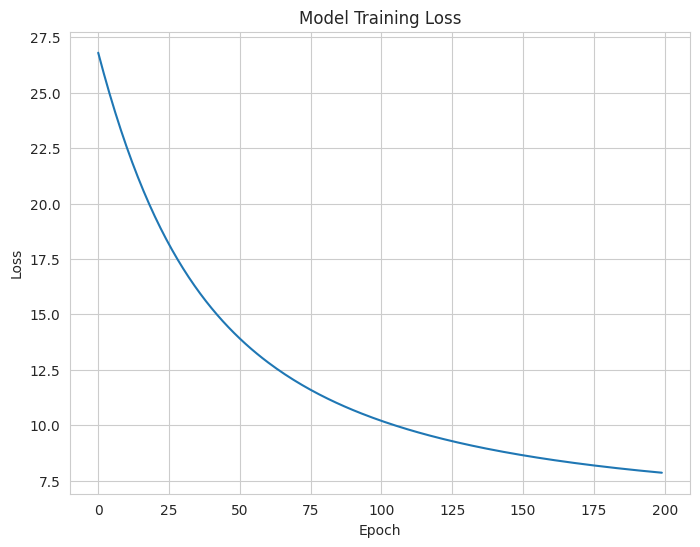

In [ ]:
# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


### Make Prediction



After training, the model can make predictions on new data. This section explains how predictions are generated and interpreted in nnet-survival models.

**What the Model Predicts:**

1. **Conditional Survival Probabilities** (`y_pred`):
   - Shape: `(n_samples, n_intervals)`
   - Each value represents the probability of surviving that interval, given survival up to the start of the interval
   - Example: `y_pred[i, j]` = probability patient `i` survives interval `j`

2. **Cumulative Survival Probabilities**:
   - Calculated by multiplying conditional probabilities across intervals
   - Formula: `S(t) = ∏(conditional survival probabilities up to time t)`
   - Represents the overall probability of surviving up to time `t`

**Prediction Process:**

1. **Input**: Patient features (covariates)
2. **Forward Pass**: Model processes features through the neural network
3. **Output**: Vector of conditional survival probabilities (one per interval)
4. **Post-processing**: Convert to cumulative survival probabilities for interpretation

**Interpreting Predictions:**

- **For Each Patient**: The model outputs a survival curve showing probability of survival over time
- **Group Comparisons**: Can compare average survival curves between groups (e.g., treatment vs. control)
- **Individual Risk**: Patients with lower survival probabilities are at higher risk

**Visualization:**

- **Survival Curves**: Plot cumulative survival probabilities over time
- **Comparison**: Overlay predicted curves with actual Kaplan-Meier estimates
- **Validation**: Good models show close agreement between predicted and observed survival





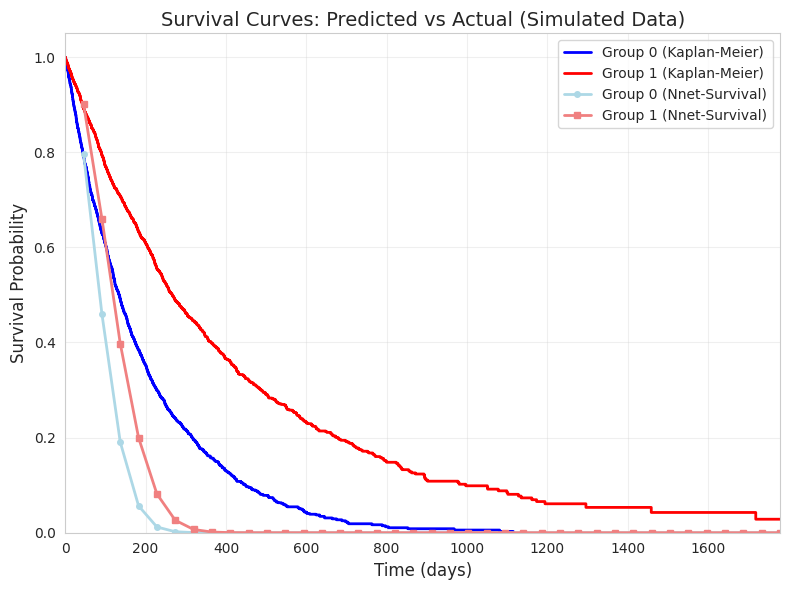


Model successfully trained and evaluated on simulated data!


In [ ]:
# Make predictions
y_pred = model.predict(x_train, verbose=0)

# Calculate survival curves for each group
def calculate_survival_curve(y_pred):
    """Calculate cumulative survival probabilities from interval predictions."""
    surv_curve = np.cumprod(y_pred, axis=1)
    return surv_curve

# Get predictions for each group
pred_group0 = calculate_survival_curve(y_pred[x_train.flatten() == 0])
pred_group1 = calculate_survival_curve(y_pred[x_train.flatten() == 1])

# Calculate mean survival curves
mean_surv_group0 = pred_group0.mean(axis=0)
mean_surv_group1 = pred_group1.mean(axis=0)

# Compare with Kaplan-Meier estimates
kmf = KaplanMeierFitter()

# Group 0
kmf.fit(t_obs[x_train.flatten() == 0], event_observed=f_obs[x_train.flatten() == 0], label='Group 0 (KM)')
km_group0 = kmf.survival_function_

# Group 1
kmf.fit(t_obs[x_train.flatten() == 1], event_observed=f_obs[x_train.flatten() == 1], label='Group 1 (KM)')
km_group1 = kmf.survival_function_

# Determine the correct column name for the KM estimate (should be the same as 'label')
label0 = km_group0.columns[0]
label1 = km_group1.columns[0]

# --- Fix length mismatch for predicted curves and time points ---
# breaks has length n_intervals+1, breaks[1:] has length n_intervals
# mean_surv_group0 and mean_surv_group1 have length n_intervals

# For plotting, use breaks[1:] (length n_intervals) vs mean_surv_group0 (length n_intervals)
# to match 1-to-1 and avoid ValueError.

plt.figure(figsize=(8, 6))

# Plot Kaplan-Meier curves
plt.step(km_group0.index, km_group0[label0], where='post',
         label='Group 0 (Kaplan-Meier)', linewidth=2, color='blue')
plt.step(km_group1.index, km_group1[label1], where='post',
         label='Group 1 (Kaplan-Meier)', linewidth=2, color='red')

# Plot predicted curves (no concatenate, just use mean_surv_group0/1 directly)
plt.plot(breaks[1:], mean_surv_group0, 'o-',
         label='Group 0 (Nnet-Survival)', linewidth=2, markersize=4, color='lightblue')
plt.plot(breaks[1:], mean_surv_group1, 's-',
         label='Group 1 (Nnet-Survival)', linewidth=2, markersize=4, color='lightcoral')

plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.title('Survival Curves: Predicted vs Actual (Simulated Data)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, breaks[-1])
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

print("\nModel successfully trained and evaluated on simulated data!")


## Fit Model with  Data from the SUPPORT Study



The Study to Understand Prognoses and Preferences for Outcomes and Risks of Treatments (SUPPORT) is a large observational study of hospitalized patients. The SUPPORT2 dataset is a widely-used benchmark dataset in survival analysis.

**About the SUPPORT Study:**

- **Purpose**: To understand prognoses and preferences for outcomes and risks of treatments for seriously ill hospitalized adults
- **Study Period**: Conducted in the 1990s across multiple medical centers
- **Sample Size**: 9,105 patients
- **Follow-up**: Up to 5.5 years (approximately 2,029 days maximum)

**Key Variables in SUPPORT2:**

- **Outcome Variables**:
  - `d.time`: Survival time in days (time to death or censoring)
  - `death`: Event indicator (1 = death occurred, 0 = censored)
  
- **Predictor Variables** (47 total features):
  - Demographics: `age`, `sex`, `race`
  - Clinical: `aps` (APACHE score), `sps` (SAPS score), `scoma` (coma score)
  - Disease information: `dzgroup`, `dzclass`
  - Laboratory values: `bili`, `crea`, `sod`, `ph`, `glucose`, `bun`
  - Economic: `charges`, `totcst`, `income`
  - Functional status: `adlp`, `adls`






### Load and Preprocess the Data

In [ ]:
# Download SUPPORT dataset from GitHub
import urllib.request

data_url = 'https://raw.githubusercontent.com/MGensheimer/nnet-survival/master/data/support2.csv'
data_file = 'support2.csv'

if not os.path.exists(data_file):
    print("Downloading SUPPORT dataset...")
    urllib.request.urlretrieve(data_url, data_file)
    print("Download complete!")
else:
    print("SUPPORT dataset already exists.")

# Load the data
support_data = pd.read_csv(data_file)

print(f"Dataset shape: {support_data.shape}")
print(f"\nColumn names:")
print(support_data.columns.tolist()[:20])  # Show first 20 columns
print(f"\nFirst few rows:")
support_data.head()


SUPPORT dataset already exists.
Dataset shape: (9105, 47)

Column names:
['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup', 'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m']

First few rows:


,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [ ]:
# Check for missing values
print("Missing values per column:")
missing = support_data.isnull().sum()
print(missing[missing > 0].head(10))

# Display basic statistics
print("\nBasic statistics:")
print(support_data.describe())


Missing values per column:
edu        1634
income     2982
scoma         1
charges     172
totcst      888
totmcst    3475
avtisst      82
race         42
sps           1
aps           1
dtype: int64

Basic statistics:
               age        death     hospdead         slos       d.time  \
count  9105.000000  9105.000000  9105.000000  9105.000000  9105.000000   
mean     62.650823     0.681054     0.259198    17.863042   478.449863   
std      15.593710     0.466094     0.438219    22.006440   560.383272   
min      18.041990     0.000000     0.000000     3.000000     3.000000   
25%      52.797000     0.000000     0.000000     6.000000    26.000000   
50%      64.856990     1.000000     0.000000    11.000000   233.000000   
75%      73.998960     1.000000     1.000000    20.000000   761.000000   
max     101.847960     1.000000     1.000000   343.000000  2029.000000   

            num.co          edu        scoma       charges         totcst  \
count  9105.000000  7471.000000  9104

### Visualize the data

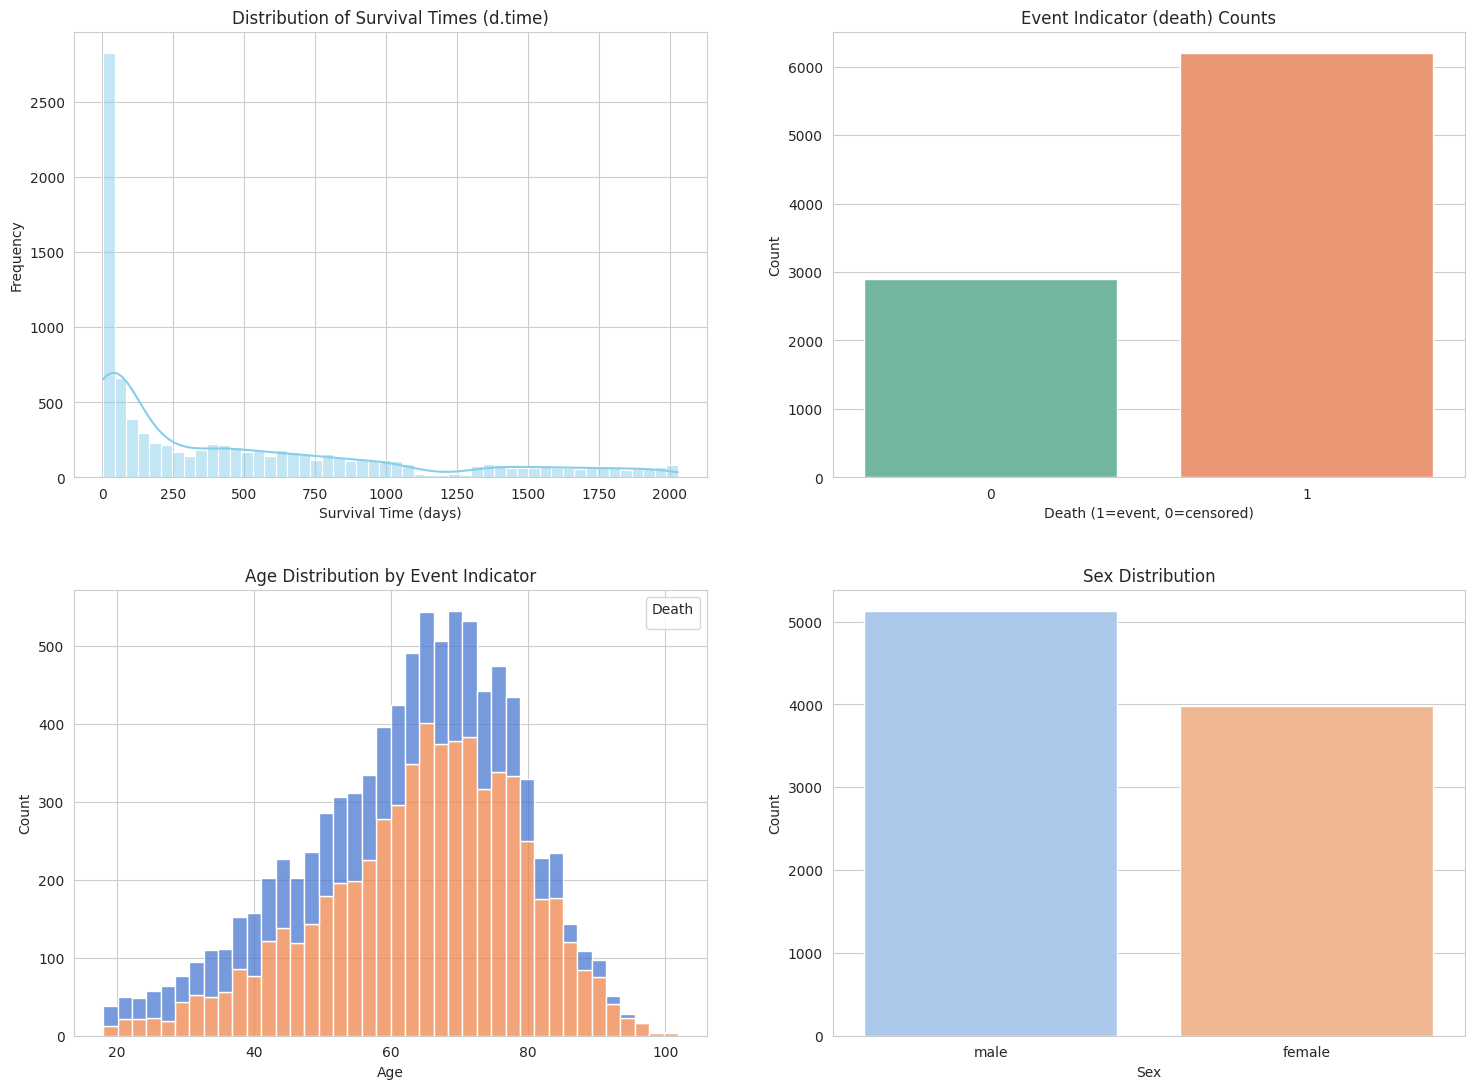

In [ ]:
# Visualize the data in a panel/grid layout

import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.tight_layout(pad=6.0)

# (1) Distribution of survival times
sns.histplot(support_data['d.time'], bins=50, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Survival Times (d.time)")
axs[0, 0].set_xlabel("Survival Time (days)")
axs[0, 0].set_ylabel("Frequency")

# (2) Proportion of death events
sns.countplot(x='death', data=support_data, palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title("Event Indicator (death) Counts")
axs[0, 1].set_xlabel("Death (1=event, 0=censored)")
axs[0, 1].set_ylabel("Count")

# (3) Age distribution by death status
sns.histplot(data=support_data, x='age', hue='death', multiple='stack', bins=40, palette='muted', ax=axs[1, 0])
axs[1, 0].set_title("Age Distribution by Event Indicator")
axs[1, 0].set_xlabel("Age")
axs[1, 0].set_ylabel("Count")
handles, labels = axs[1, 0].get_legend_handles_labels()
axs[1, 0].legend(handles=handles, labels=labels, title='Death')

# (4) Gender breakdown
sns.countplot(x='sex', data=support_data, palette='pastel', ax=axs[1, 1])
axs[1, 1].set_title("Sex Distribution")
axs[1, 1].set_xlabel("Sex")
axs[1, 1].set_ylabel("Count")

plt.show()



### Extract Survival Time and Event Indicator


Before building the survival model, we need to extract the two essential components of survival data: survival time and event indicator. This is a critical preprocessing step that prepares the data for survival analysis.

**What We Extract:**

1. **Survival Time** (`t_support` or `t_obs`):
   - The observed time until the event occurs or the patient is censored
   - In SUPPORT2: Column `d.time` represents days from study entry to death or end of follow-up
   - Units: Typically in days, but can be hours, months, or years depending on the study
   - Range: From minimum follow-up time to maximum follow-up time

2. **Event Indicator** (`f_support` or `f_obs`):
   - Binary variable indicating whether the event occurred
   - `1` = Event occurred (e.g., death) - **uncensored observation**
   - `0` = Event did not occur (censored) - **censored observation**
   - In SUPPORT2: Column `death` (1 = death, 0 = alive at end of follow-up)

**Why Both Are Needed:**

- **Survival Time**: Tells us *when* something happened (or when follow-up ended)
- **Event Indicator**: Tells us *what* happened (event vs. censoring)
- Together, they allow the model to properly handle both observed events and censored observations

**Handling Different Column Names:**

The code includes flexible logic to find the correct columns:
- Checks for common names: `d.time`, `time`, `death`, `event`
- Searches for columns containing keywords like "time" or "death"
- Provides clear error messages if columns cannot be found

In [ ]:
# Extract survival time and event indicator
# Based on the SUPPORT dataset structure
if 'd.time' in support_data.columns:
    t_support = support_data['d.time'].values
elif 'time' in support_data.columns:
    t_support = support_data['time'].values
else:
    # Try to find time column
    time_cols = [col for col in support_data.columns if 'time' in col.lower()]
    if time_cols:
        t_support = support_data[time_cols[0]].values
        print(f"Using column: {time_cols[0]}")
    else:
        raise ValueError("Could not find time column")

if 'death' in support_data.columns:
    f_support = support_data['death'].values
elif 'event' in support_data.columns:
    f_support = support_data['event'].values
else:
    # Try to find event column
    event_cols = [col for col in support_data.columns if 'event' in col.lower() or 'death' in col.lower()]
    if event_cols:
        f_support = support_data[event_cols[0]].values
        print(f"Using column: {event_cols[0]}")
    else:
        raise ValueError("Could not find event column")

print(f"\nSurvival time statistics:")
print(f"Mean: {t_support.mean():.2f} days")
print(f"Median: {np.median(t_support):.2f} days")
print(f"Min: {t_support.min():.2f} days")
print(f"Max: {t_support.max():.2f} days")
print(f"\nEvent statistics:")
print(f"Number of events: {f_support.sum()}")
print(f"Number of censored: {(1 - f_support).sum()}")
print(f"Event rate: {f_support.mean():.2%}")



Survival time statistics:
Mean: 478.45 days
Median: 233.00 days
Min: 3.00 days
Max: 2029.00 days

Event statistics:
Number of events: 6201
Number of censored: 2904
Event rate: 68.11%


### Select Features for Modeling

Feature selection is a crucial step in building survival models. The goal is to identify which variables (features) are most predictive of survival outcomes while excluding variables that should not be used as predictors.


1. **Outcome Variables**: Never use the outcome itself as a predictor!
   - `d.time` or `time`: The survival time (this is what we're trying to predict)
   - `death` or `event`: The event indicator (this is the outcome)
   - `id`: Patient identifiers (not predictive)

2. **Variables That Leak Information**:
   - Variables measured after the event occurred
   - Variables that are consequences of the outcome, not causes

**What to Include:**

1. **Demographic Variables**: Age, sex, race, education
2. **Clinical Variables**: Disease severity scores (APS, SAPS), comorbidities
3. **Laboratory Values**: Blood tests, vital signs
4. **Functional Status**: Activities of daily living scores
5. **Economic Factors**: Income, insurance status (if relevant)

**Feature Selection Process:**

1. **Identify Numeric Variables**: Select columns with numeric data types (`int64`, `float64`)
2. **Exclude Outcome Variables**: Remove time and event columns
3. **Handle Missing Data**: Consider variables with many missing values
4. **Feature Engineering**: May need to create new features or transform existing ones
5. **Feature Scaling**: Standardize features for neural network training

In [ ]:
# Select features for modeling
# Common features in survival analysis: age, sex, disease severity, etc.
# Adjust based on actual columns in the dataset

# Get numeric columns (excluding time and event columns)
exclude_cols = ['d.time', 'time', 'death', 'event', 'id']
feature_cols = [col for col in support_data.columns
                if col not in exclude_cols and support_data[col].dtype in ['int64', 'float64']]

# Limit to first 10 numeric features for simplicity (adjust as needed)
feature_cols = feature_cols[:10]

print(f"Selected features: {feature_cols}")

# Extract features
X_support = support_data[feature_cols].values

# Handle missing values (simple imputation with median)
imputer = SimpleImputer(strategy='median')
X_support = imputer.fit_transform(X_support)

# Standardize features
scaler = StandardScaler()
X_support = scaler.fit_transform(X_support)

print(f"\nFeature matrix shape: {X_support.shape}")


Selected features: ['age', 'hospdead', 'slos', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst']

Feature matrix shape: (9105, 10)


### Split Data Training and Test Sets

In [ ]:
# Split into training and test sets
X_train, X_test, t_train, t_test, f_train, f_test = train_test_split(
    X_support, t_support, f_support,
    test_size=0.3,
    random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")


Training set size: 6373
Test set size: 2732
Number of features: 10


### Define Time Intervals for Support Data

In [ ]:
# Define time intervals for SUPPORT data
# Use intervals based on the maximum follow-up time
max_time = max(t_train.max(), t_test.max())
breaks_support = np.arange(0., max_time + 100, max_time / 40)
n_intervals_support = len(breaks_support) - 1

print(f"Maximum follow-up time: {max_time:.2f} days")
print(f"Number of intervals: {n_intervals_support}")
print(f"Interval size: {breaks_support[1] - breaks_support[0]:.2f} days")


Maximum follow-up time: 2029.00 days
Number of intervals: 41
Interval size: 50.73 days


### Convert to Survival Array Rormat

In [ ]:
# Convert to survival array format
y_train_support = make_surv_array(t_train, f_train, breaks_support)
y_test_support = make_surv_array(t_test, f_test, breaks_support)

print(f"Training survival array shape: {y_train_support.shape}")
print(f"Test survival array shape: {y_test_support.shape}")


Training survival array shape: (6373, 41)
Test survival array shape: (2732, 41)


### Build Model

In [ ]:
# Build a more complex model for the SUPPORT dataset
model_support = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(n_intervals_support, activation='sigmoid')
])

model_support.compile(
    loss=surv_likelihood(n_intervals_support),
    optimizer=optimizers.Adam(learning_rate=0.001)
)

print("Model architecture:")
model_support.summary()


Model architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 41)             │         1,353 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,137 (16.16 KB)

 Trainable params: 4,137 (16.16 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [ ]:
# Train the model
early_stopping_support = EarlyStopping(
    monitor='loss',
    patience=15,
    restore_best_weights=True
)

history_support = model_support.fit(
    X_train, y_train_support,
    batch_size=128,
    epochs=200,
    verbose=1,
    callbacks=[early_stopping_support],
    validation_split=0.2
)


Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 25.6020 - val_loss: 21.9636
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.6264 - val_loss: 17.0230
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.8048 - val_loss: 15.4458
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.6429 - val_loss: 14.8642
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0962 - val_loss: 14.6325
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.7278 - val_loss: 14.5013
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.5256 - val_loss: 14.4301
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.3814 - val_loss: 14.3870
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.2707 - val_loss: 14.3507
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.2200 - val_loss: 14.3368
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.2369 - val_loss: 14.3086
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 

### Visualize the Training History

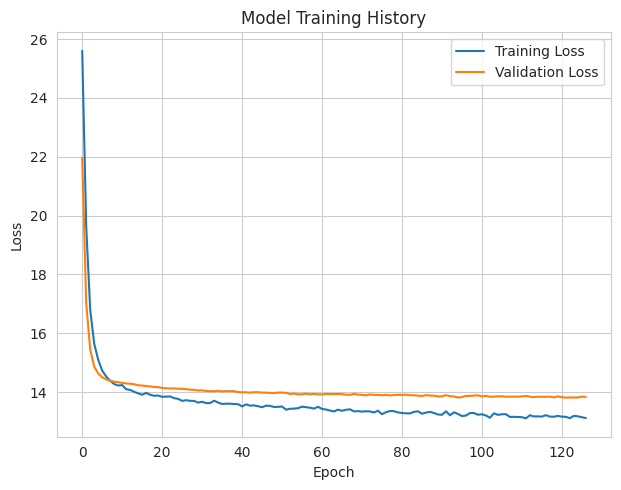

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_support.history['loss'], label='Training Loss')
if 'val_loss' in history_support.history:
    plt.plot(history_support.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Calculate Performance Metrics

We'll calculate the C-Index and Brier Scores at 6 months, 1 year, 2 years, and 3 years.


In [ ]:
# Make predictions on test set
y_pred_test = model_support.predict(X_test, verbose=0)

# Calculate risk scores (sum of hazard probabilities)
# Higher risk = lower survival
hazard_pred = 1 - y_pred_test  # Convert survival probs to hazard probs
risk_scores = np.sum(hazard_pred, axis=1)

# Calculate C-Index
c_index = concordance_index(t_test, -risk_scores, f_test)
print(f"C-Index: {c_index:.4f}")
print(f"\nInterpretation: A C-Index of {c_index:.4f} means that in {c_index*100:.2f}% of comparable pairs, ")
print(f"the model correctly predicts which patient will have the event first.")


C-Index: 0.7867

Interpretation: A C-Index of 0.7867 means that in 78.67% of comparable pairs, 
the model correctly predicts which patient will have the event first.


### Calcualte Brier Scores

In [ ]:
# Function to calculate Brier Score at a specific time point
def calculate_brier_score(y_pred, breaks, t_obs, f_obs, time_point):
    """
    Calculate Brier Score at a specific time point.

    Parameters:
    -----------
    y_pred : array-like
        Predicted conditional survival probabilities
    breaks : array-like
        Time interval boundaries
    t_obs : array-like
        Observed times
    f_obs : array-like
        Event indicators
    time_point : float
        Time point at which to calculate Brier Score

    Returns:
    --------
    brier_score : float
        Brier Score at the specified time point
    """
    # Calculate survival probabilities at time_point for each sample
    interval_idx = np.searchsorted(breaks[1:], time_point, side='right')

    if interval_idx == 0:
        surv_probs = np.ones(y_pred.shape[0])
    elif interval_idx >= y_pred.shape[1]:
        surv_probs = np.prod(y_pred, axis=1)
    else:
        surv_probs = np.prod(y_pred[:, :interval_idx], axis=1)

    # Create binary outcome: 1 if event occurred before time_point, 0 otherwise
    y_true = ((t_obs <= time_point) & (f_obs == 1)).astype(float)

    # Only include observations that are not censored before time_point
    # (i.e., we know their status at time_point)
    mask = (t_obs >= time_point) | (f_obs == 1)

    if mask.sum() == 0:
        return np.nan

    # Calculate Brier Score
    brier_score = np.mean((surv_probs[mask] - (1 - y_true[mask])) ** 2)

    return brier_score


# Calculate Brier Scores at different time points
time_points = {
    '6 months': 180,
    '1 year': 365,
    '2 years': 730,
    '3 years': 1095
}

print("Brier Scores at different time points:")
print("-" * 50)
brier_scores = {}

for label, time_point in time_points.items():
    brier_score = calculate_brier_score(y_pred_test, breaks_support, t_test, f_test, time_point)
    brier_scores[label] = brier_score
    print(f"{label:10s} ({time_point:4.0f} days): {brier_score:.4f}")

print("\nInterpretation: Lower Brier Score indicates better calibration.")
print("Brier Score ranges from 0 (perfect) to 1 (worst).")


Brier Scores at different time points:
--------------------------------------------------
6 months   ( 180 days): 0.1653
1 year     ( 365 days): 0.3374
2 years    ( 730 days): 0.2859
3 years    (1095 days): 0.1794

Interpretation: Lower Brier Score indicates better calibration.
Brier Score ranges from 0 (perfect) to 1 (worst).


### Prediction on Test Data

Let's visualize how well our model predicts survival compared to the actual observed survival.


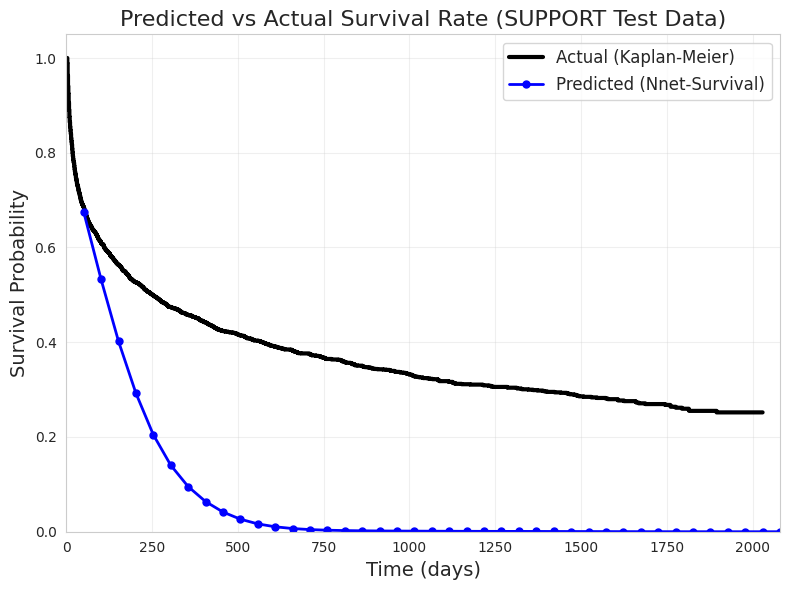


Comparison of survival probabilities at key time points:
------------------------------------------------------------
6 months   ( 180 days): KM = 0.5417, Predicted = 0.4021, Difference = 0.1396
1 year     ( 365 days): KM = 0.4557, Predicted = 0.0953, Difference = 0.3603
2 years    ( 730 days): KM = 0.3712, Predicted = 0.0045, Difference = 0.3667
3 years    (1095 days): KM = 0.3179, Predicted = 0.0011, Difference = 0.3168


In [ ]:
# Calculate predicted survival curves for test set
pred_surv_curves = calculate_survival_curve(y_pred_test)  # Only pass y_pred_test
mean_pred_surv = pred_surv_curves.mean(axis=0)

# Calculate actual survival curve using Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(t_test, event_observed=f_test, label='Actual (Kaplan-Meier)')
km_surv = kmf.survival_function_

# The column name for the KM curve may not be 'KM_estimate', so get the column name dynamically
km_col = km_surv.columns[0]

# Plot comparison
plt.figure(figsize=(8, 6))

# Plot Kaplan-Meier curve
plt.step(km_surv.index, km_surv[km_col], where='post',
         label='Actual (Kaplan-Meier)', linewidth=3, color='black')

# Plot predicted curve
# Make sure both x and y have the same length; they should match the number of survival intervals
# breaks_support: length N+1 (for N intervals), mean_pred_surv: length N
# To plot survival for each interval, plot at break right-edges (breaks_support[1:]), and y is mean_pred_surv only.
plt.plot(breaks_support[1:], mean_pred_surv, 'o-',
         label='Predicted (Nnet-Survival)', linewidth=2, markersize=5, color='blue')

# Attempt to add confidence intervals for KM estimate if available
# We look for columns that could be lower/upper CI, based on common lifelines naming conventions
ci_lower_col = None
ci_upper_col = None
for col in km_surv.columns:
    if ("lower" in col or "Lower" in col) and "0.95" in col:
        ci_lower_col = col
    if ("upper" in col or "Upper" in col) and "0.95" in col:
        ci_upper_col = col
if ci_lower_col and ci_upper_col:
    plt.fill_between(km_surv.index,
                     km_surv[ci_lower_col],
                     km_surv[ci_upper_col],
                     alpha=0.2, color='gray', label='95% CI (KM)')

plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Survival Probability', fontsize=14)
plt.title('Predicted vs Actual Survival Rate (SUPPORT Test Data)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, min(breaks_support[-1], t_test.max() * 1.1))
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

print("\nComparison of survival probabilities at key time points:")
print("-" * 60)
for label, time_point in time_points.items():
    # Get KM estimate at this time point
    km_at_time = kmf.predict(time_point)

    # Get predicted survival at this time point
    interval_idx = np.searchsorted(breaks_support[1:], time_point, side='right')
    if interval_idx == 0:
        pred_at_time = 1.0
    elif interval_idx >= len(mean_pred_surv):
        pred_at_time = mean_pred_surv[-1]
    else:
        pred_at_time = mean_pred_surv[interval_idx - 1]

    print(f"{label:10s} ({time_point:4.0f} days): KM = {km_at_time:.4f}, Predicted = {pred_at_time:.4f}, "
          f"Difference = {abs(km_at_time - pred_at_time):.4f}")


### Plot Survival Curves for Different Groups

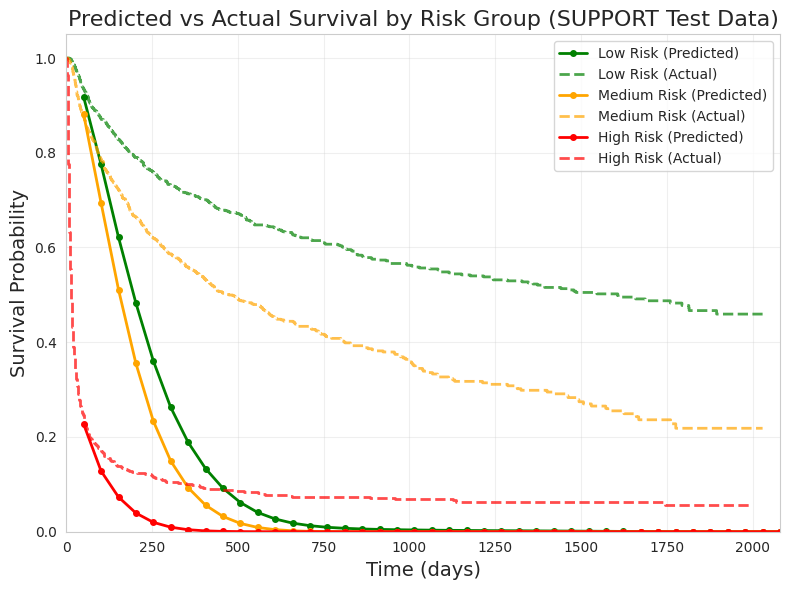


Risk group sizes:
Low risk: 910 patients
Medium risk: 912 patients
High risk: 910 patients


In [ ]:
# Plot survival curves for different risk groups
# Divide test set into risk tertiles based on predicted risk
risk_tertiles = np.percentile(risk_scores, [33.3, 66.7])
low_risk = risk_scores <= risk_tertiles[0]
med_risk = (risk_scores > risk_tertiles[0]) & (risk_scores <= risk_tertiles[1])
high_risk = risk_scores > risk_tertiles[1]

plt.figure(figsize=(8, 6))

for risk_group, label, color in zip([low_risk, med_risk, high_risk],
                                    ['Low Risk', 'Medium Risk', 'High Risk'],
                                    ['green', 'orange', 'red']):
    # Predicted survival
    pred_group = calculate_survival_curve(y_pred_test[risk_group])
    mean_pred_group = pred_group.mean(axis=0)
    if len(breaks_support[1:]) == len(mean_pred_group):
        plt.plot(breaks_support[1:], mean_pred_group,
                 'o-', label=f'{label} (Predicted)', linewidth=2, markersize=4, color=color)
    elif len(breaks_support) == len(mean_pred_group):
        plt.plot(breaks_support, mean_pred_group,
                 'o-', label=f'{label} (Predicted)', linewidth=2, markersize=4, color=color)
    else:
        min_len = min(len(breaks_support[1:]), len(mean_pred_group))
        plt.plot(breaks_support[1:1+min_len], mean_pred_group[:min_len],
                 'o-', label=f'{label} (Predicted)', linewidth=2, markersize=4, color=color)

    # Actual survival (Kaplan-Meier)
    kmf_group = KaplanMeierFitter()
    kmf_group.fit(t_test[risk_group], event_observed=f_test[risk_group], label=f'{label} (KM)')
    km_group = kmf_group.survival_function_

    # Robustly get the survival probability column (usually the only column in survival_function_)
    if km_group.shape[1] == 1:
        surv_col = km_group.columns[0]
        plt.step(km_group.index, km_group[surv_col], where='post',
                 label=f'{label} (Actual)', linewidth=2, linestyle='--', color=color, alpha=0.7)
    else:
        # Fallback: if more than one column, try find one containing "KM" or last column
        match_cols = [c for c in km_group.columns if "KM" in c or "survival" in c.lower()]
        if match_cols:
            plt.step(km_group.index, km_group[match_cols[0]], where='post',
                     label=f'{label} (Actual)', linewidth=2, linestyle='--', color=color, alpha=0.7)
        else:
            plt.step(km_group.index, km_group.iloc[:, -1], where='post',
                     label=f'{label} (Actual)', linewidth=2, linestyle='--', color=color, alpha=0.7)

plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Survival Probability', fontsize=14)
plt.title('Predicted vs Actual Survival by Risk Group (SUPPORT Test Dat Plot Predicted vs Actual Survival Rate {#prediction-plots}a)', fontsize=16)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(0, min(breaks_support[-1], t_test.max() * 1.1))
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

print(f"\nRisk group sizes:")
print(f"Low risk: {low_risk.sum()} patients")
print(f"Medium risk: {med_risk.sum()} patients")
print(f"High risk: {high_risk.sum()} patients")


## Summary and Conclusions


1. **Nnet-Survival is a Powerful Tool**: The discrete-time survival model successfully integrates neural networks with survival analysis, allowing for flexible modeling of complex relationships between covariates and survival outcomes.

2. **Handles Censored Data Effectively**: The model's likelihood function properly accounts for both uncensored and censored observations, making it suitable for real-world survival data.

3. **Scalable and Flexible**: The implementation using TensorFlow/Keras allows for:
   - Training on large datasets
   - Easy integration of complex neural network architectures
   - Efficient batch processing

4. **Provides Individualized Predictions**: Unlike traditional survival models that provide population-level estimates, nnet-survival can generate personalized survival curves for each individual.

5. **Performance Metrics**:
   - **C-Index**: Measures discrimination (ability to rank patients by risk)
   - **Brier Score**: Measures calibration (accuracy of predicted probabilities)
   - Both metrics are important for evaluating survival models

## Applications

Nnet-survival is particularly useful in:
- Medical research and clinical prediction
- Healthcare analytics
- Any domain with time-to-event data and complex covariate relationships

## Limitations and Considerations

1. **Time Discretization**: The choice of time intervals can affect model performance
2. **Hyperparameter Tuning**: Network architecture and training parameters need careful tuning
3. **Interpretability**: Neural networks are less interpretable than traditional survival models
4. **Computational Resources**: Deep networks may require significant computational resources

## Future Directions

- Integration with attention mechanisms for better feature importance
- Extension to competing risks models
- Development of interpretability tools for neural survival models


## Resources

**Research Papers**

1. **Gensheimer, M. F., & Narasimhan, B. (2019)**. A scalable discrete-time survival model for neural networks. *PeerJ*, 7, e6257.
   - URL: https://pmc.ncbi.nlm.nih.gov/articles/PMC6348952/
   - DOI: 10.7717/peerj.6257

**Software and Code**

1. **Nnet-Survival GitHub Repository**
   - URL: https://github.com/MGensheimer/nnet-survival
   - Contains: Source code, examples, and datasets

2. **SUPPORT Dataset**
   - Available in the nnet-survival repository: https://github.com/MGensheimer/nnet-survival/tree/master/data
   - Original study: Knaus, W. A., et al. (1995). The SUPPORT prognostic model: Objective estimates of survival for seriously ill hospitalized adults. *Annals of Internal Medicine*, 122(3), 191-203.

**Related Tools and Libraries**

1. **Lifelines** - Survival analysis in Python
   - URL: https://github.com/CamDavidsonPilon/lifelines
   - Useful for: Kaplan-Meier estimation, Cox models, and survival analysis utilities

2. **TensorFlow/Keras** - Deep learning framework
   - URL: https://www.tensorflow.org/
   - Used for: Neural network implementation

3. **scikit-survival** - Survival analysis with scikit-learn
   - URL: https://github.com/sebp/scikit-survival
   - Useful for: Additional survival analysis methods

**Additional Reading**

1. **Survival Analysis Fundamentals**
   - Klein, J. P., & Moeschberger, M. L. (2003). *Survival Analysis: Techniques for Censored and Truncated Data* (2nd ed.). Springer.

2. **Deep Learning for Survival Analysis**
   - Various recent papers on neural networks for survival analysis
   - DeepSurv: https://github.com/jaredleekatzman/DeepSurv

**Tutorial and Documentation**

1. **Nnet-Survival Documentation**: Check the README and examples in the GitHub repository
2. **TensorFlow Tutorials**: https://www.tensorflow.org/tutorials
3. **Lifelines Documentation**: https://lifelines.readthedocs.io/

